In [1]:
'''Pipeline:
1. data load
2. polynomial transform
3. linear regression
4. prediction

'''

'Pipeline:\n1. data load\n2. polynomial transform\n3. linear regression\n4. prediction\n\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

In [3]:
import numpy
import matplotlib.pyplot as plt


X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

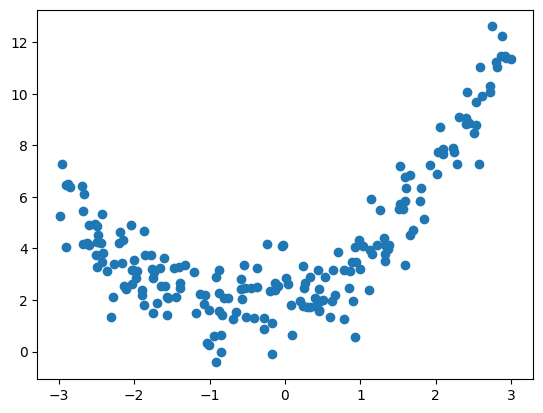

In [4]:
plt.scatter(X, y)
plt.show()

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

**Linear regression**

In [6]:
# Applying linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.33758797828733256

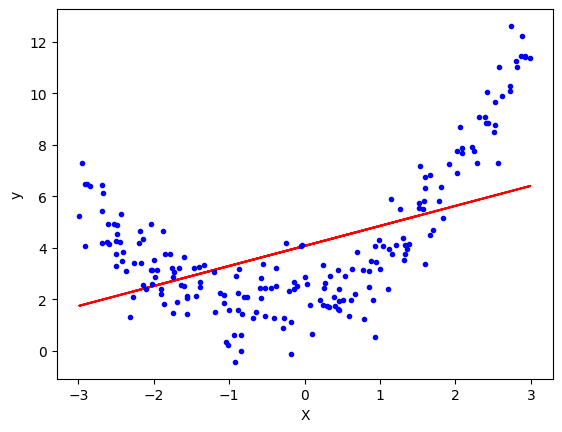

In [8]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

**polynomial transformation**

In [9]:
#polynomial transformation
poly = PolynomialFeatures(degree=2,include_bias=True) #hyperparameter is degree

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [10]:
X_train_trans.shape
# x^0 + x^1 + x^2 as degree = 2

(160, 3)

In [11]:
print(X_train[0])
print(X_train_trans[0])

[-2.27472296]
[ 1.         -2.27472296  5.17436453]


**Polynomial Linear Regression**

In [12]:
# Applying Polynomial Linear Regression
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [13]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.95196646 0.7817602 ]]
[1.90111974]


In [14]:
y_pred = lr.predict(X_test_trans)

In [15]:
r2_score(y_test,y_pred)

0.9223474770938497

In [16]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

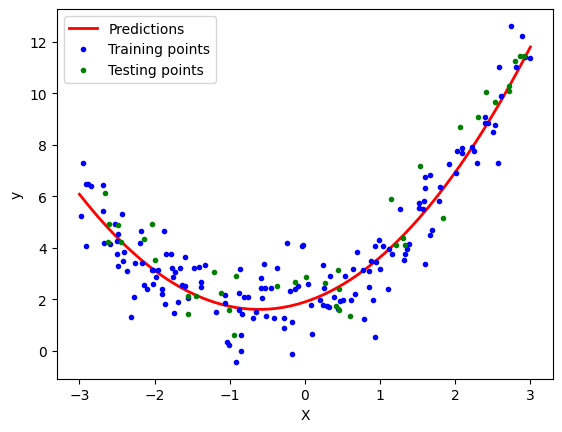

In [17]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

**Polynomial SGD regression**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


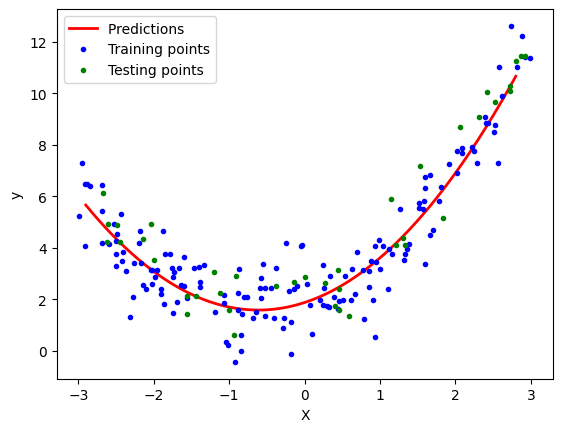

0.9201600908452152


In [18]:
# Applying Gradient Descent
sgd = SGDRegressor(max_iter=1000)
sgd.fit(X_train_trans,y_train)
y_pred = sgd.predict(X_test_trans)


X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)


plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions ")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

print(r2_score(y_test,y_pred))